In [1]:
## Advanced Course in Machine Learning
## Week 4
## Exercise 3 / Stochastic neighbor embedding

import numpy as np
import scipy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from numpy import linalg as LA
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
from sklearn.manifold import TSNE
import math
import sys

import mnist

sns.set_style("darkgrid")

In [2]:
x_train, t_train, x_test, t_test = mnist.load()

In [3]:
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [4]:
x_train_s = x_train[0:1000, :]
t_train_s = t_train[0:1000]
print(x_train_s.shape)
print(t_train_s.shape)

(1000, 784)
(1000,)


In [5]:
#np.savetxt("x_train_s_1000.csv", x_train_s, delimiter=",")

In [6]:
#print(x_train_s[1,:])

In [66]:
# Initialize z
mu, sigma = 0, 0.1 # mean and standard deviation
arraySize = (1000, 2)
z = np.random.normal(mu, sigma, arraySize)

In [67]:
print(z.shape)
print(z)

(1000, 2)
[[-0.10422973  0.00355711]
 [ 0.11065332 -0.14308585]
 [-0.12535728  0.02309277]
 ...
 [-0.10583784  0.18544842]
 [-0.03189298  0.00175291]
 [ 0.12730734 -0.14509061]]


In [22]:
def calc_pairwise2(matrix):
    l1dist = pairwise_distances(matrix, metric='l1')
    l1distSquared = l1dist**2
    return l1distSquared, l1dist

def calc_pairwise(matrix, sigma):
    var = 2*(sigma**2)
    height = len(matrix[:,0])
    width = len(matrix[0,:])
    dist = np.zeros(shape=(height,height))
    for i in range(height):
        for j in range(height):
            if (i<j):
                d2 = np.log(np.sum((np.subtract(matrix[i,:], matrix[j,:])**2)/var))
                dist[i, j] = d2
                dist[j, i] = d2
    return dist.astype(np.float64)

def calc_p(d2):
    p = np.zeros(shape=(d2.shape))
    for k in range(len(d2[:,0])):
        d2[k,k] = sys.float_info.max
    #print('D2 after placement of max')
    #print(d2)
    for i in range(len(d2[:,0])):
        for j in range(len(d2[:,0])):
            upper = np.exp(-d2[i,j])
            lower = np.sum(np.exp(-d2[i]))-upper
            p[i,j] = upper/lower
    return p.astype(np.float64)

In [23]:
# Standardize x_train
x_train_st = StandardScaler().fit_transform(x_train_s)
print(x_train_st)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/home/mkotola/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/mkotola/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [24]:
pca = decomposition.PCA(n_components=50)
pca.fit(x_train_st)
x_pc = pca.transform(x_train_st)
print(x_pc.shape)
#print(x_pc)

(1000, 50)


In [69]:
print(x_pc.shape)
print(z.shape)

(1000, 50)
(1000, 2)


In [70]:
sigma_orig = 1000
sigma_embed = 1
# Calculate the pairwise distances between samples in original space
dist_orig = calc_pairwise(x_pc, sigma_orig)
# Calculate the pairwise distances between samples in embedding space
dist_embed = calc_pairwise(z, sigma_embed)

In [71]:
print(dist_orig.shape)
print(dist_orig)

(1000, 1000)
[[ 0.         -8.15876725 -6.56472525 ... -8.0486584  -8.1388443
  -7.66020202]
 [-8.15876725  0.         -6.55026072 ... -8.65225572 -8.50871153
  -7.66610632]
 [-6.56472525 -6.55026072  0.         ... -6.57424046 -6.60426691
  -6.48586017]
 ...
 [-8.0486584  -8.65225572 -6.57424046 ...  0.         -8.06143556
  -7.94570673]
 [-8.1388443  -8.50871153 -6.60426691 ... -8.06143556  0.
  -7.84992317]
 [-7.66020202 -7.66610632 -6.48586017 ... -7.94570673 -7.84992317
   0.        ]]


In [72]:
print(dist_embed.shape)
print(dist_embed)

(1000, 1000)
[[ 0.         -3.3861283  -7.78962572 ... -4.10176103 -5.9453715
  -3.2740509 ]
 [-3.3861283   0.         -3.17825782 ... -2.55874794 -3.88009532
  -8.86896778]
 [-7.78962572 -3.17825782  0.         ... -4.31472828 -5.38268157
  -3.07775546]
 ...
 [-4.10176103 -2.55874794 -4.31472828 ...  0.         -3.9319227
  -2.50340029]
 [-5.9453715  -3.88009532 -5.38268157 ... -3.9319227   0.
  -3.7527193 ]
 [-3.2740509  -8.86896778 -3.07775546 ... -2.50340029 -3.7527193
   0.        ]]


In [73]:
p_orig = calc_p(dist_orig)
p_embed = calc_p(dist_embed)

In [74]:
print(p_orig)

[[0.         0.00108831 0.00022085 ... 0.00097473 0.00106682 0.00066076]
 [0.00097694 0.         0.00019542 ... 0.00160124 0.00138683 0.00059668]
 [0.00099656 0.00098224 0.         ... 0.0010061  0.0010368  0.00092092]
 ...
 [0.00095163 0.00174161 0.00021768 ... 0.         0.00096388 0.00085846]
 [0.00083085 0.00120314 0.00017897 ... 0.00076892 0.         0.00062224]
 [0.00089256 0.00089785 0.00027565 ... 0.00118784 0.00107923 0.        ]]


In [75]:
print(p_embed)

[[0.00000000e+00 4.11334833e-05 3.37329867e-03 ... 8.41413568e-05
  5.31953644e-04 3.67721478e-05]
 [1.40275785e-04 0.00000000e+00 1.13944737e-04 ... 6.13227606e-05
  2.29905190e-04 3.49134490e-02]
 [7.66668159e-03 7.56191399e-05 0.00000000e+00 ... 2.35648171e-04
  6.85907816e-04 6.83881688e-05]
 ...
 [6.20624677e-04 1.32585215e-04 7.68039435e-04 ... 0.00000000e+00
  5.23633099e-04 1.25445422e-04]
 [4.56056152e-04 5.77972734e-05 2.59752637e-04 ... 6.08719244e-05
  0.00000000e+00 5.08845159e-05]
 [1.88513690e-04 5.34200309e-02 1.54909581e-04 ... 8.72186984e-05
  3.04281960e-04 0.00000000e+00]]


In [76]:
def loss(p, q):
    return np.nansum(np.multiply(p, np.log(np.divide(p, q))))

In [77]:
p_embed[p_embed == 0] = np.nan

In [78]:
print(p_embed)

[[           nan 4.11334833e-05 3.37329867e-03 ... 8.41413568e-05
  5.31953644e-04 3.67721478e-05]
 [1.40275785e-04            nan 1.13944737e-04 ... 6.13227606e-05
  2.29905190e-04 3.49134490e-02]
 [7.66668159e-03 7.56191399e-05            nan ... 2.35648171e-04
  6.85907816e-04 6.83881688e-05]
 ...
 [6.20624677e-04 1.32585215e-04 7.68039435e-04 ...            nan
  5.23633099e-04 1.25445422e-04]
 [4.56056152e-04 5.77972734e-05 2.59752637e-04 ... 6.08719244e-05
             nan 5.08845159e-05]
 [1.88513690e-04 5.34200309e-02 1.54909581e-04 ... 8.72186984e-05
  3.04281960e-04            nan]]


In [79]:
p = p_orig
q = p_embed

In [80]:
loss_1 = loss(p, q)

In [81]:
print(loss_1)

1652.314361970901


print(z.shape[0])
s = np.zeros(shape=(z.shape[0],1))
print(s)
             

In [113]:
def gradient (p, q, z):
    print('Shape of p ', str(p.shape))
    print('Shape of q ', str(q.shape))
    print('Shape of z ', str(z.shape))
    print('Length of z col 0')
    print(len(z[:,0]))
    print('Length of z col 1')
    print(len(z[:,0]))
    grad = np.zeros(shape=z.shape)
    for i in range(len(p[:,0])):
        print(i)
        s = np.zeros(shape=(z.shape))
        for j in range(len(p[0,:])):
            print(j)
            pq = p[i,j] - q[i,j] + p[j,i] - q[j,i]
            pq = np.asmatrix(pq)
            pq = pq.transpose()
            subt = np.subtract(z[:,i], z[:,j])
            s = np.add(s, (np.multiply(subt, pq)))
        grad[i,:] = s

In [114]:
epochs = 5
initStepSize = 0.5
tau = 0.0005
lossHistory = []

lossHistory.append(loss_1)

stepSize = initStepSize
t = 0  

# Main loop
for epoch in np.arange(0, epochs):
    # initialize the total loss for the epoch
    epochLoss = []    
    
    t = t + 1
    
    gradientB = gradient(p, q, z)

    z -= stepSize * gradientB 
    stepSize = initStepSize / (1 + initStepSize * tau * t)
    dist_embed = calc_pairwise(z, sigma_embed)
    q = calc_p(dist_embed)
            
    lossHistory.append(loss(p, q))

Shape of p  (1000, 1000)
Shape of q  (1000, 1000)
Shape of z  (1000, 2)
Length of z col 0
1000
Length of z col 1
1000
0
0


ValueError: operands could not be broadcast together with shapes (1000,2) (1,1000) 

In [115]:
print(x_pc.shape)
print(x_pc)

(1000, 50)
[[-0.5119814   2.96464839  1.56004027 ...  0.92112841  1.25604697
  -2.33154465]
 [ 8.20135175  7.12339568 -2.74360844 ... -0.4304691   0.57148271
  -0.11921724]
 [ 3.11316396 -7.93517371 -5.85515744 ... 11.25477543 -2.56575941
  -2.18038842]
 ...
 [ 3.71951294 12.07263976 -3.72411414 ... -0.71200943  0.62594778
   1.54151665]
 [ 2.73705548 -0.95972283  6.74240764 ...  1.09767811 -3.62233972
  -1.40787924]
 [-3.71638534  5.43243136  1.34578227 ...  1.1054597  -1.26613198
   0.99775664]]


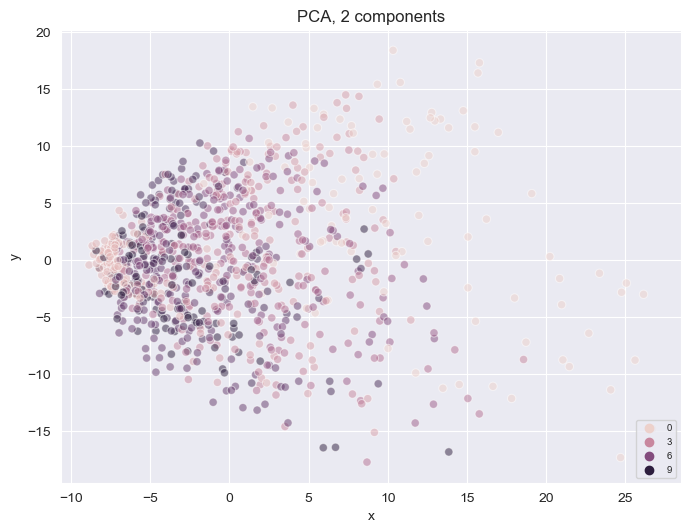

In [116]:
# Visualize PCA with 2 dimensions
plt.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
sns.scatterplot(x_pc[:, 0], x_pc[:, 1], hue=t_train_s, alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower right', fontsize='x-small')
plt.title('PCA, 2 components')
plt.show()

In [47]:
# Compare with sklearn.manifold.tsne
X_embedded = TSNE(n_components=2).fit_transform(x_train_s)
print(X_embedded.shape)

(1000, 2)


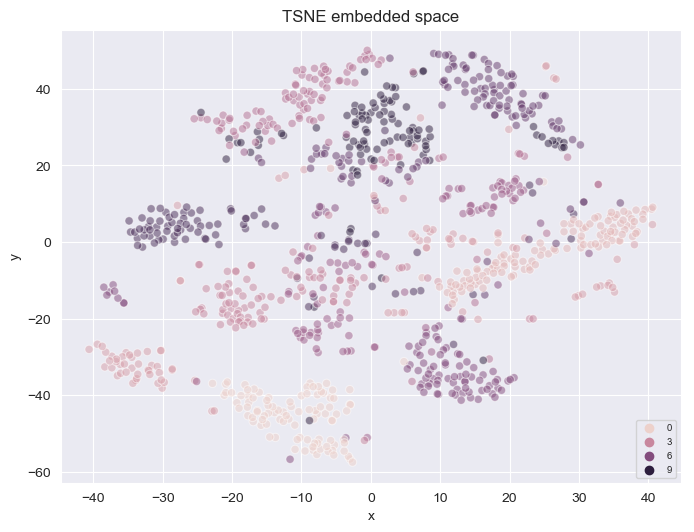

In [55]:
plt.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
sns.scatterplot(X_embedded[:, 0], X_embedded[:, 1], hue=t_train_s, alpha=0.5)
#origin = [0], [0] # origin point
#Plot the principal axis
#plt.quiver(*origin, w[0,0], w[1,0], color=['g'], scale=1, label='W')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower right', fontsize='x-small')
plt.title('TSNE embedded space')
plt.show()